In [49]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn
import statsmodels
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Insurance_Loss.csv')

In [3]:
df.head()
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15290 entries, 0 to 15289
Data columns (total 9 columns):
Policy Number                  15290 non-null int64
Age                            15290 non-null int64
Years of Driving Experience    15290 non-null int64
Number of Vehicles             15290 non-null int64
Gender                         15290 non-null object
Married                        15290 non-null object
Vehicle Age                    15290 non-null int64
Fuel Type                      15290 non-null object
Losses                         15290 non-null float64
dtypes: float64(1), int64(5), object(3)
memory usage: 1.0+ MB


(15290, 9)

In [4]:
df.head()

,Policy Number,Age,Years of Driving Experience,Number of Vehicles,Gender,Married,Vehicle Age,Fuel Type,Losses
0,150024,24,5,1,M,Married,11,P,203.319595
1,144880,31,10,1,F,Single,6,P,402.197302
2,133742,56,37,1,M,Married,0,D,553.132096
3,151282,52,31,1,F,Married,15,P,292.430579
4,174407,20,3,1,M,Single,15,P,246.540576


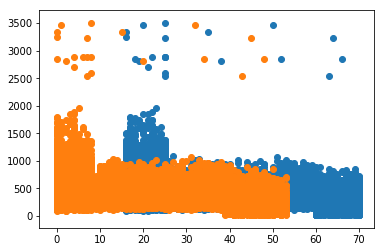

In [5]:
plt.scatter(x = 'Age', y='Losses',data=df)
plt.scatter(x = 'Years of Driving Experience', y='Losses',data=df)


(array([2685., 2077., 1129.,  915.,  948., 1133.,  956., 1104., 1964.,
        2379.]),
 array([16. , 21.4, 26.8, 32.2, 37.6, 43. , 48.4, 53.8, 59.2, 64.6, 70. ]),
 <a list of 10 Patch objects>)

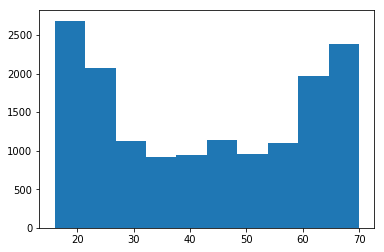

In [37]:
plt.hist(df.Age)

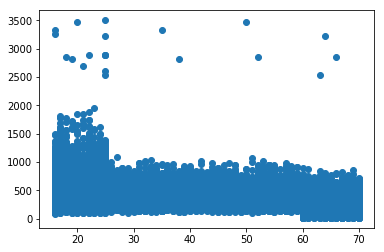

In [81]:
plt.scatter(x = 'Age', y='Losses',data=df)
plt.figure(figsize=(2,10))
plt.show()

In [7]:
df['Gender'].unique()
df['Fuel Type'].unique()

array(['P', 'D'], dtype=object)

In [8]:
np.random.seed(12345)
nums = np.random.rand(len(df))
mask_gender = nums > 0.5

In [28]:
df['Gender_New'] = df.Gender.map({'M':1,'F':0})
df['Married_New'] = df.Married.map({'Married':0,'Single':1})
df['Fuel_New'] = df['Fuel Type'].map({'P':0,'D':1})
#df['Number of Vehicles'] = df['Num_Vehicle'].map({})
df.head()

,Policy Number,Age,Years of Driving Experience,Number of Vehicles,Gender,Married,Vehicle Age,Fuel Type,Losses,Gender_New,Married_New,Fuel_New
0,150024,24,5,1,M,Married,11,P,203.319595,1,0,0
1,144880,31,10,1,F,Single,6,P,402.197302,0,1,0
2,133742,56,37,1,M,Married,0,D,553.132096,1,0,1
3,151282,52,31,1,F,Married,15,P,292.430579,0,0,0
4,174407,20,3,1,M,Single,15,P,246.540576,1,1,0


In [10]:
df['Number of Vehicles'].unique()

array([1, 2, 3, 4], dtype=int64)

In [11]:
lm2 = smf.ols(formula="Losses~Age", data=df).fit()

In [12]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Losses   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     3732.
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        07:52:01   Log-Likelihood:            -1.0467e+05
No. Observations:               15290   AIC:                         2.094e+05
Df Residuals:                   15288   BIC:                         2.094e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    650.1030      4.640    140.101      0.000     641.008     659.198
Age           -6.1482      0.101    -61.090      0.000      -6.345      -5.951
==============================================================================
Omnibus:                    10677.162   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           404563.903
Skew:                           2.886   Prob(JB):                         0.00
Kurtosis:                      27.530   Cond. No.                         116.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
lm = smf.ols(formula="Losses~df['Years of Driving Experience']", data=df).fit()

In [14]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Losses   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     3714.
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        07:52:01   Log-Likelihood:            -1.0468e+05
No. Observations:               15290   AIC:                         2.094e+05
Df Residuals:                   15288   BIC:                         2.094e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                           539.0021      3.062    176.025      0.000     533.000     545.004
df['Years of Driving Experience']    -6.2842      0.103    -60.945      0.000      -6.486      -6.082
==============================================================================
Omnibus:                    10708.100   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           407127.107
Skew:                           2.898   Prob(JB):                         0.00
Kurtosis:                      27.606   Cond. No.                         49.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# LOSSES WITH CATEGORICAL

In [15]:
lm = smf.ols(formula="Losses~Married_New+Gender_New+Fuel_New", data=df).fit()

In [16]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Losses   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     6029.
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        07:52:01   Log-Likelihood:            -1.0038e+05
No. Observations:               15290   AIC:                         2.008e+05
Df Residuals:                   15286   BIC:                         2.008e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     282.0476      2.518    111.996      0.000     277.111     286.984
Married_New    57.9815      2.848     20.356      0.000      52.398      63.565
Gender_New    -35.3508      2.818    -12.545      0.000     -40.874     -29.827
Fuel_New      410.7852      3.396    120.948      0.000     404.128     417.443
==============================================================================
Omnibus:                    15357.935   Durbin-Watson:                   1.705
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2486057.646
Skew:                           4.570   Prob(JB):                         0.00
Kurtosis:                      64.796   Cond. No.                         3.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
lm = smf.ols(formula="Losses~Age+df['Years of Driving Experience']+df['Number of Vehicles']+df['Vehicle Age']+Married_New+Gender_New+Fuel_New", data=df).fit()

In [18]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Losses   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     3718.
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        07:52:01   Log-Likelihood:                -98743.
No. Observations:               15290   AIC:                         1.975e+05
Df Residuals:                   15282   BIC:                         1.976e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                           602.0774     17.944     33.553      0.000     566.905     637.250
Age                                  -4.1573      0.913     -4.553      0.000      -5.947      -2.368
df['Years of Driving Experience']    -0.4317      0.932     -0.463      0.643      -2.258       1.395
df['Number of Vehicles']             -1.9184      1.309     -1.465      0.143      -4.484       0.648
df['Vehicle Age']                   -12.2328      0.328    -37.298      0.000     -12.876     -11.590
Married_New                          79.8464      2.588     30.852      0.000      74.774      84.919
Gender_New                          -51.1051      2.547    -20.062      0.000     -56.098     -46.112
Fuel_New                            301.4193      3.589     83.988      0.000     294.385     308.454
==============================================================================
Omnibus:                    18019.325   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5261211.478
Skew:                           5.889   Prob(JB):                         0.00
Kurtosis:                      93.109   Cond. No.                         794.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(array([8.489e+03, 6.617e+03, 1.350e+02, 2.700e+01, 1.000e+00, 2.000e+00,
        6.000e+00, 5.000e+00, 5.000e+00, 3.000e+00]),
 array([-343.91798113,   14.5980472 ,  373.11407552,  731.63010385,
        1090.14613218, 1448.6621605 , 1807.17818883, 2165.69421716,
        2524.21024548, 2882.72627381, 3241.24230214]),
 <a list of 10 Patch objects>)

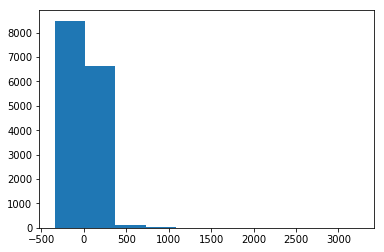

In [46]:
lmx = smf.ols(formula="Losses~Age+df['Vehicle Age']+Married_New+Gender_New+Fuel_New", data=df).fit()
lmx.summary()
h = lmx.resid
plt.hist(h)


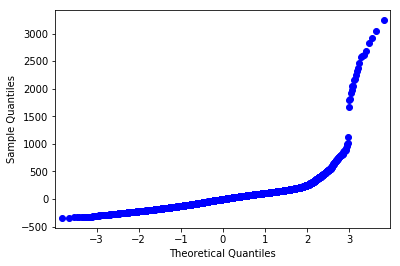

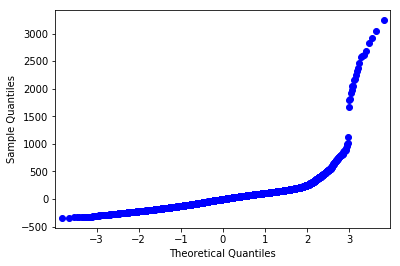

In [52]:
sm.qqplot(lmx.resid)

In [50]:
statsmodels.stats.diagnostic.het_breuschpagan(h,)

TypeError: het_breuschpagan() missing 1 required positional argument: 'exog_het'

In [38]:
lm1 = LinearRegression()

In [39]:
y = df.Losses
feature_cols = ['Age','Vehicle Age','Married_New','Gender_New','Fuel_New']
x = df[feature_cols]

In [40]:
lm1.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
lm1.intercept_

553.9916857696873

In [42]:
lm1.coef_

array([ -4.57984878, -12.2476515 ,  79.81385268,  51.08764009,
       301.35546562])

In [47]:
lm1.score(x,y)

0.6299797370807736

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=42)

In [61]:
y_pred_train = lm1.predict(x_train)
y_pred_test = lm1.predict(x_test)

In [62]:
train_pred_df = pd.DataFrame({'actual':y_train, 
                              'predicted': y_pred_train,
                              'residual':y_train - y_pred_train })

In [63]:
test_pred_df = pd.DataFrame({'actual':y_test, 
                              'predicted': y_pred_test,
                              'residual':y_test - y_pred_test })
test_pred_df

,actual,predicted,residual
3522,478.408426,355.858940,122.549486
12365,581.484171,657.678934,-76.194763
895,62.868311,155.837488,-92.969177
2310,305.861085,345.989939,-40.128854
8747,896.749323,806.038483,90.710841
8949,382.190132,343.611288,38.578843
5405,343.737711,351.383255,-7.645544
12698,329.401518,231.958248,97.443270
3559,352.798849,297.463861,55.334988
4526,472.866350,425.021200,47.845150


In [64]:
from sklearn import metrics
rmse_train = np.sqrt(metrics.mean_squared_error(y_train,y_pred_train))
rmse_train

149.34189433200146

In [65]:
rmse_test = np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))
rmse_test

165.40593351904127

In [75]:
metrics.r2_score(y_train,y_pred_train)

0.643181871576338

In [76]:
metrics.r2_score(y_test,y_pred_test)

0.601783411833921

Text(0.5,0,'predicted')

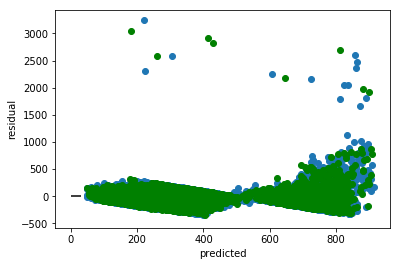

In [77]:
plt.scatter(lm.predict(x_train),y_train - lm.predict(x_train))
plt.scatter(lm.predict(x_test), y_test-lm.predict(x_test),c='g')
plt.hlines(y=0,xmin=0,xmax=30)
plt.ylabel('residual')
plt.xlabel('predicted')

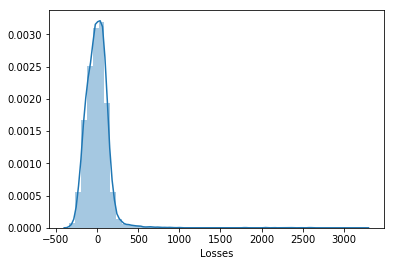

In [78]:
import seaborn as sns
residual_train = y_train - y_pred_train
sns.distplot(residual_train)

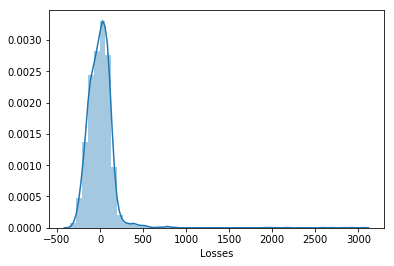

In [70]:
residual_test = y_test - y_pred_test
sns.distplot(residual_test)